## Relationship Between Fuel Production and Consumption

## Objectives

1. To assess the sustainability and balance of fuel production and consumption within a country.

2. To evaluate the economical impact of fuel production.

3. To compare the price of fuel production and consumption.

4. To identify trends and patterns in per capita enery production and consumption.

5. To evaluate the average production and consumption of fuel throughout the years.



In [176]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score

# Import classifier algorithm here
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Oversampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline


## Loading and Previewing Data

In [177]:
data = pd.read_csv('Fuel production vs consumption.csv',encoding="latin-1")
data

,Year,Entity,Gas production(m³),Gas consumption(m³),Coal production(Ton),Coal consumption(Ton),Oil production(m³),Oil consumption(m³),Gas production per capita(m³),Gas consumption per capita(m³),Coal production per capita(Ton),Coal consumption per capita(Ton),Oil production per capita(m³),Oil consumption per capita(m³),Population
0,1980,Afghanistan,1.699000e+09,56640000.0,119000.0,119000.0,0.0,406500.0,127.2,4.241,0.00891,0.00891,0.0,0.03043,13360000.0
1,1981,Afghanistan,2.237000e+09,84960000.0,125000.0,125000.0,0.0,464600.0,169.9,6.450,0.00949,0.00949,0.0,0.03527,13170000.0
2,1982,Afghanistan,2.294000e+09,141600000.0,145000.0,145000.0,0.0,452900.0,178.1,10.990,0.01126,0.01126,0.0,0.03516,12880000.0
3,1983,Afghanistan,2.407000e+09,141600000.0,145000.0,145000.0,0.0,638800.0,192.0,11.290,0.01157,0.01157,0.0,0.05095,12540000.0
4,1984,Afghanistan,2.407000e+09,141600000.0,148000.0,148000.0,0.0,638800.0,197.2,11.600,0.01213,0.01213,0.0,0.05234,12200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,2017,Zimbabwe,0.000000e+00,0.0,2928000.0,2559000.0,0.0,1427000.0,0.0,0.000,0.20570,0.17980,0.0,0.10030,14240000.0
9233,2018,Zimbabwe,0.000000e+00,0.0,3348000.0,2069000.0,0.0,1771000.0,0.0,0.000,0.23180,0.14330,0.0,0.12260,14440000.0
9234,2019,Zimbabwe,0.000000e+00,0.0,3076000.0,1826000.0,0.0,1583000.0,0.0,0.000,0.21010,0.12470,0.0,0.10810,14650000.0
9235,2020,Zimbabwe,0.000000e+00,0.0,3659000.0,3469000.0,0.0,NaN,0.0,0.000,0.24620,0.23340,0.0,NaN,14860000.0


In [178]:
def null_values(data): 
    missing_values = data.isnull().sum()

    return missing_values

In [179]:
null_values(data)

Year                                   0
Entity                                 0
Gas production(m³)                   529
Gas consumption(m³)                  548
Coal production(Ton)                 420
Coal consumption(Ton)                420
Oil production(m³)                   445
Oil consumption(m³)                  682
Gas production per capita(m³)       1548
Gas consumption per capita(m³)      1566
Coal production per capita(Ton)     1480
Coal consumption per capita(Ton)    1480
Oil production per capita(m³)       1417
Oil consumption per capita(m³)      1636
Population                          1105
dtype: int64

In [180]:
# Visualization of Outliers

outlier_column = ['Gas production(m³)', 'Gas consumption(m³)','Coal production(Ton)', 'Coal consumption(Ton)',
    'Oil production(m³)', 'Oil consumption(m³)','Gas production per capita(m³)', 'Gas consumption per capita(m³)',
    'Coal production per capita(Ton)', 'Coal consumption per capita(Ton)',
    'Oil production per capita(m³)', 'Oil consumption per capita(m³)',
    'Population'
]

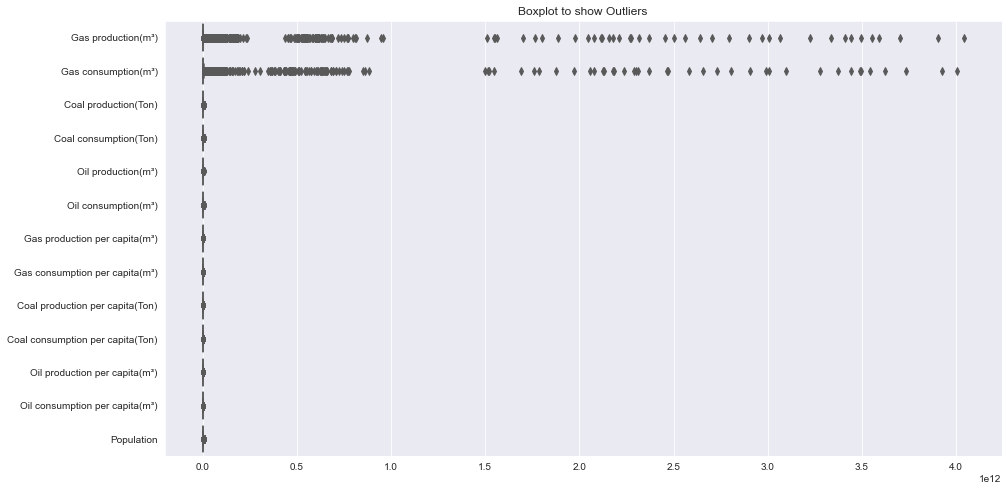

In [181]:
# Boxplot to show Outliers
selected_column =data[outlier_column]

plt.figure(figsize=(15,8))

sns.boxplot(data=selected_column,palette="Set2", orient="h")

plt.title("Boxplot to show Outliers")
plt.show()



## Data Cleaning

In [182]:
# Handling Outliers

outlier_columns = ['Gas production(m³)', 'Gas consumption(m³)','Coal production(Ton)', 'Coal consumption(Ton)',
    'Oil production(m³)', 'Oil consumption(m³)','Gas production per capita(m³)', 'Gas consumption per capita(m³)',
    'Coal production per capita(Ton)', 'Coal consumption per capita(Ton)',
    'Oil production per capita(m³)', 'Oil consumption per capita(m³)','Population'
]


In [183]:
mean_columns = ['Gas production(m³)', 'Gas consumption(m³)','Coal production(Ton)', 'Coal consumption(Ton)',
    'Oil production(m³)', 'Oil consumption(m³)','Gas production per capita(m³)', 'Gas consumption per capita(m³)',
    'Coal production per capita(Ton)', 'Coal consumption per capita(Ton)',
    'Oil production per capita(m³)', 'Oil consumption per capita(m³)','Population']

data[mean_columns] = data[mean_columns].fillna(data[mean_columns].mean())

In [184]:
null_values(data)

Year                                0
Entity                              0
Gas production(m³)                  0
Gas consumption(m³)                 0
Coal production(Ton)                0
Coal consumption(Ton)               0
Oil production(m³)                  0
Oil consumption(m³)                 0
Gas production per capita(m³)       0
Gas consumption per capita(m³)      0
Coal production per capita(Ton)     0
Coal consumption per capita(Ton)    0
Oil production per capita(m³)       0
Oil consumption per capita(m³)      0
Population                          0
dtype: int64

In [185]:
# # Replace zeros with NaN
# data.replace(0, pd.NA, inplace=True)

# # Fill NaN values with the median of each column
# data_filled_median = data.fillna(data.median())

# # Fill NaN values with the mean of each column
# data_filled_mean = data.fillna(data.mean())

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9237 entries, 0 to 9236
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              9237 non-null   int64  
 1   Entity                            9237 non-null   object 
 2   Gas production(m³)                9237 non-null   float64
 3   Gas consumption(m³)               9237 non-null   float64
 4   Coal production(Ton)              9237 non-null   float64
 5   Coal consumption(Ton)             9237 non-null   float64
 6   Oil production(m³)                9237 non-null   float64
 7   Oil consumption(m³)               9237 non-null   float64
 8   Gas production per capita(m³)     9237 non-null   float64
 9   Gas consumption per capita(m³)    9237 non-null   float64
 10  Coal production per capita(Ton)   9237 non-null   float64
 11  Coal consumption per capita(Ton)  9237 non-null   float64
 12  Oil pr

# Exploratory Data Analysis

In [187]:
# Checking for statistical information on the dataset
data.describe()

,Year,Gas production(m³),Gas consumption(m³),Coal production(Ton),Coal consumption(Ton),Oil production(m³),Oil consumption(m³),Gas production per capita(m³),Gas consumption per capita(m³),Coal production per capita(Ton),Coal consumption per capita(Ton),Oil production per capita(m³),Oil consumption per capita(m³),Population
count,9237.000000,9.237000e+03,9.237000e+03,9.237000e+03,9.237000e+03,9.237000e+03,9.237000e+03,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000,9.237000e+03
mean,2000.443434,2.383023e+10,2.392419e+10,5.261801e+07,5.215915e+07,4.141132e+07,4.550758e+07,963.569615,612.621901,0.424189,0.434401,2.414781,1.392495,6.719422e+07
std,12.439275,1.841523e+11,1.834632e+11,4.255471e+08,4.249815e+08,2.830843e+08,3.145646e+08,4155.367418,1830.195080,1.445246,0.942177,10.427048,3.860937,4.418989e+08
min,1973.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.590000e+02
25%,1990.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.770000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.205200,2.021000e+06
50%,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,9.083000e+03,0.000000e+00,2.091000e+06,3.702000,63.200000,0.000000,0.021730,0.015980,0.933800,8.964000e+06
75%,2011.000000,4.120000e+09,6.391000e+09,8.230000e+05,3.887000e+06,6.115000e+06,1.721000e+07,963.569615,612.621901,0.424189,0.434401,2.414781,1.392495,4.305000e+07
max,2021.000000,4.039000e+12,4.004000e+12,8.144000e+09,8.179000e+09,4.817000e+09,5.820000e+09,71520.000000,27160.000000,21.770000,7.093000,233.000000,125.800000,7.786000e+09


In [188]:
data['Gas production(m³)'].min()

0.0

In [189]:
data['Entity'].nunique()

231

In [190]:
gas_producers = data.groupby('Entity')['Gas production(m³)'].sum()
top_ten_gas_producers = gas_producers.nlargest(20)

print(top_ten_gas_producers)

Entity
World                   1.029026e+14
United States           2.416811e+13
Russia                  1.743203e+13
Former U.S.S.R.         7.929912e+12
Canada                  6.058342e+12
Iran                    3.519788e+12
Netherlands             3.108920e+12
Algeria                 2.876082e+12
Norway                  2.871502e+12
United Kingdom          2.686872e+12
Saudi Arabia            2.572021e+12
Qatar                   2.463245e+12
China                   2.347512e+12
Indonesia               2.339740e+12
United Arab Emirates    1.678522e+12
Uzbekistan              1.650010e+12
Australia               1.625854e+12
Mexico                  1.611612e+12
Turkmenistan            1.601340e+12
Malaysia                1.594713e+12
Name: Gas production(m³), dtype: float64


In [191]:
data.Entity.value_counts()

United Kingdom         49
Nigeria                49
Bahrain                49
Iraq                   49
Saudi Arabia           49
                       ..
Czechoslovakia         13
Former Yugoslavia      12
East Germany           11
South Sudan             9
Hawaiian Trade Zone     7
Name: Entity, Length: 231, dtype: int64

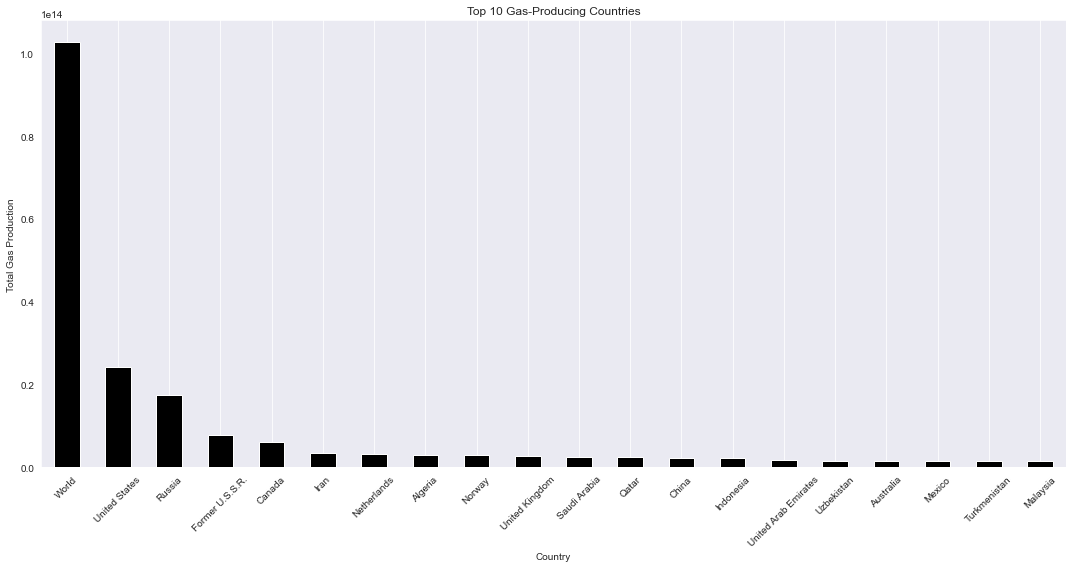

In [192]:
# Top 10 Gas-Producing Countries
plt.figure(figsize=(15,8))

top_ten_gas_producers.plot(kind='bar',color='black')
plt.title('Top 10 Gas-Producing Countries')
plt.xlabel('Country')
plt.ylabel('Total Gas Production')
plt.xticks(rotation=45)  # Rotate country names for better readability
plt.grid(axis='y')  # Show gridlines along the y-axis

plt.tight_layout()
plt.show()

In [193]:
oil_producers = data.groupby('Entity')['Oil production(m³)'].sum()
top_ten_oil_producers = oil_producers.nlargest(10)

print(top_ten_oil_producers)

Entity
World                   1.819280e+11
Saudi Arabia            2.282441e+10
United States           2.104990e+10
Russia                  1.438121e+10
Former U.S.S.R.         1.216430e+10
Iran                    1.004095e+10
China                   8.468761e+09
Mexico                  6.790531e+09
Venezuela               6.528501e+09
United Arab Emirates    6.287271e+09
Name: Oil production(m³), dtype: float64


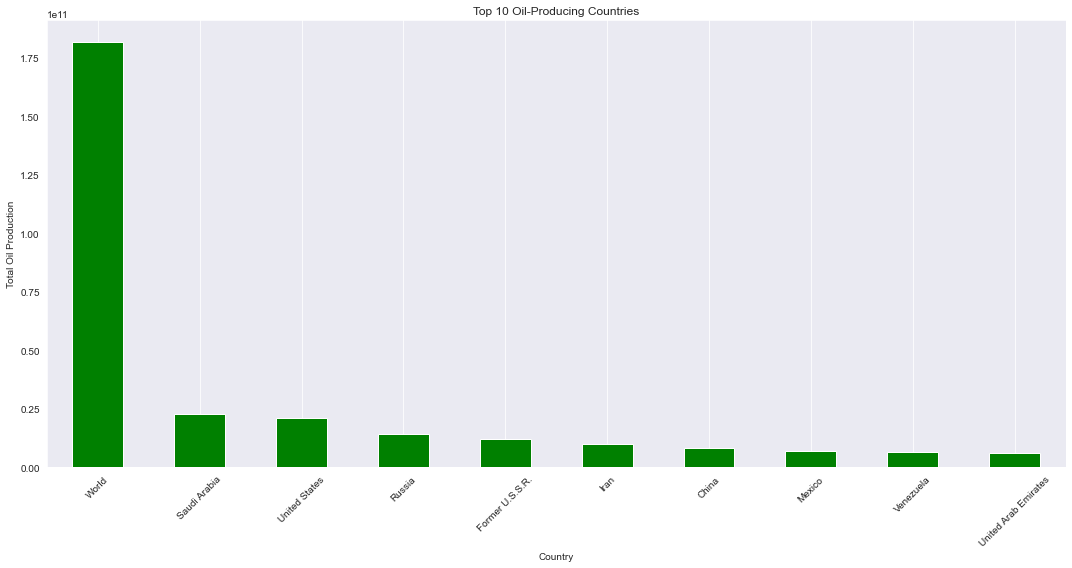

In [194]:
# Top 10 Oil-Producing Countries
plt.figure(figsize=(15,8))

top_ten_oil_producers.plot(kind='bar',color='green')
plt.title('Top 10 Oil-Producing Countries')
plt.xlabel('Country')
plt.ylabel('Total Oil Production')
plt.xticks(rotation=45)  # Rotate country names for better readability
plt.grid(axis='y')  # Show gridlines along the y-axis

plt.tight_layout()
plt.show()

In [195]:
coal_producers = data.groupby('Entity')['Coal production(Ton)'].sum()
top_ten_coal_producers = coal_producers.nlargest(10)

print(top_ten_coal_producers)

Entity
World              2.323363e+11
China              8.392214e+10
United States      3.660663e+10
India              1.522672e+10
Australia          1.297452e+10
Former U.S.S.R.    9.030826e+09
Russia             8.823918e+09
South Africa       8.766818e+09
Indonesia          7.475656e+09
Poland             7.410818e+09
Name: Coal production(Ton), dtype: float64


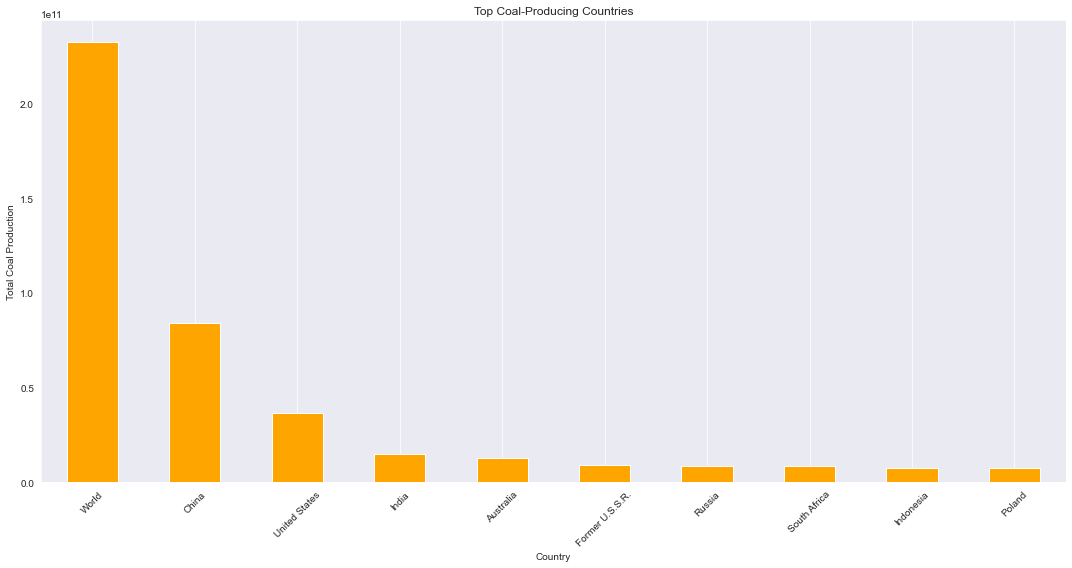

In [196]:
# Top 10 Coal-Producing Countries
plt.figure(figsize=(15,8))

top_ten_coal_producers.plot(kind='bar', color='orange')
plt.title('Top Coal-Producing Countries')
plt.xlabel('Country')
plt.ylabel('Total Coal Production')
plt.xticks(rotation=45)  # Rotate country names for better readability
plt.grid(axis='y')  # Show gridlines along the y-axis

plt.tight_layout()
plt.show()

In [197]:
# # Plotting consumption per capita for coal, oil, and gas against population
# plt.figure(figsize=(15,8))

# sns.lineplot (x ='Population', y='Gas consumption per capita(m³)', data=data, palette='blue', label='Gas')
# sns.lineplot (x='Population', y='Coal consumption per capita(Ton)', data=data, palette='blue', label='Coal')
# sns.lineplot (x='Population', y='Oil consumption per capita(m³)', data=data, palette='blue', label='Oil')

# plt.title('Consumption per capita for coal, oil, and gas against population')
# plt.ylabel('consumption per capita')
# plt.xlabel('population')

# plt.legend()

# plt.show()

In [198]:
data.columns

Index(['Year', 'Entity', 'Gas production(m³)', 'Gas consumption(m³)',
       'Coal production(Ton)', 'Coal consumption(Ton)', 'Oil production(m³)',
       'Oil consumption(m³)', 'Gas production per capita(m³)',
       'Gas consumption per capita(m³)', 'Coal production per capita(Ton)',
       'Coal consumption per capita(Ton)', 'Oil production per capita(m³)',
       'Oil consumption per capita(m³)', 'Population'],
      dtype='object')

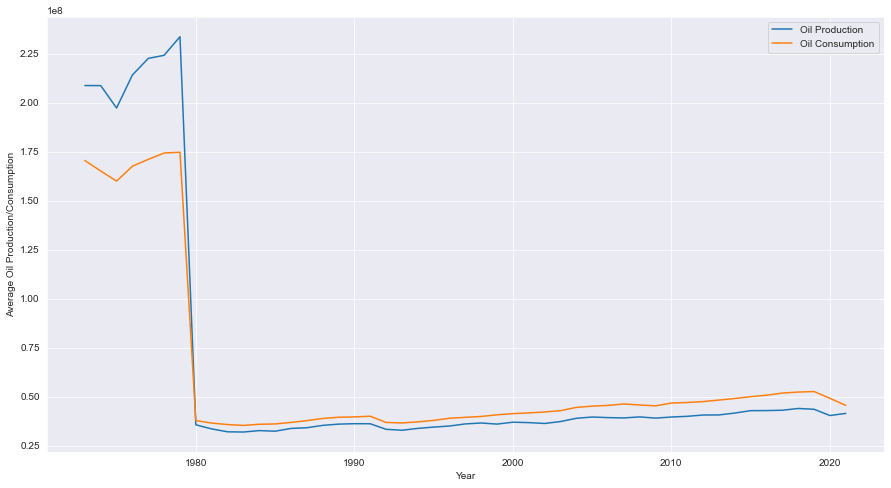

In [199]:
mean_oil_production = data.groupby('Year')[['Oil production(m³)', 'Oil consumption(m³)']].mean().reset_index()

plt.figure(figsize=(15, 8))
# Use Seaborn lineplot to visualize the data
sns.lineplot(x='Year', y='Oil production(m³)', data=mean_oil_production, label='Oil Production')
sns.lineplot(x='Year', y='Oil consumption(m³)', data=mean_oil_production, label='Oil Consumption')


plt.xlabel('Year')
plt.ylabel('Average Oil Production/Consumption')
plt.legend()
plt.show()

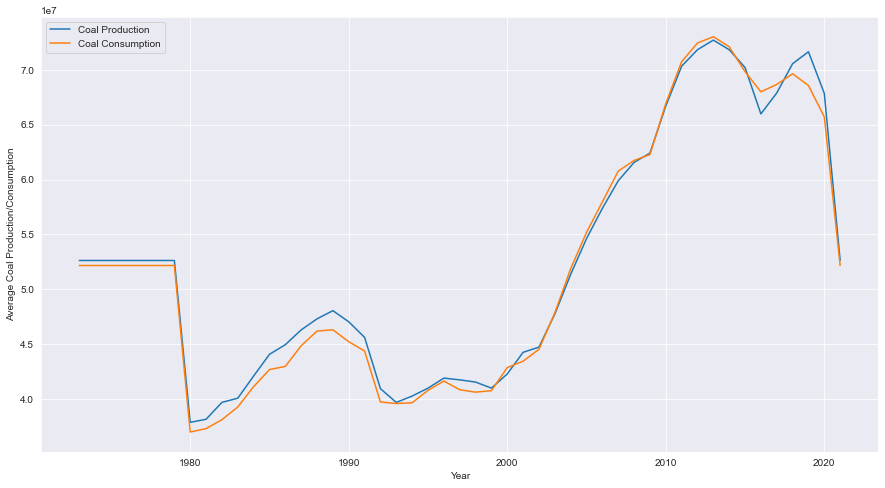

In [200]:
mean_coal_production = data.groupby('Year')[['Coal production(Ton)', 'Coal consumption(Ton)']].mean().reset_index()

plt.figure(figsize=(15, 8))
# Use Seaborn lineplot to visualize the data
sns.lineplot(x='Year', y='Coal production(Ton)', data=mean_coal_production, label='Coal Production')
sns.lineplot(x='Year', y='Coal consumption(Ton)', data=mean_coal_production, label='Coal Consumption')


plt.xlabel('Year')
plt.ylabel('Average Coal Production/Consumption')
plt.legend()
plt.show()

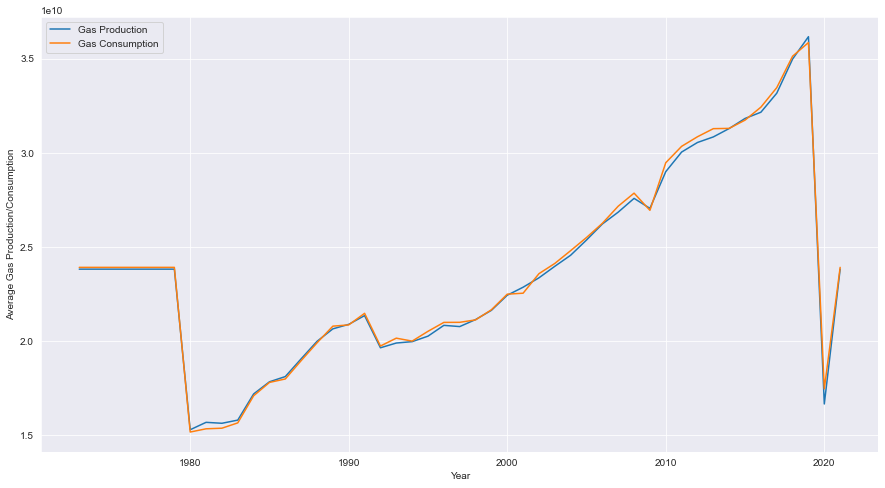

In [201]:
mean_gas_production = data.groupby('Year')[['Gas production(m³)', 'Gas consumption(m³)']].mean().reset_index()

plt.figure(figsize=(15, 8))
# Use Seaborn lineplot to visualize the data
sns.lineplot(x='Year', y='Gas production(m³)', data=mean_gas_production, label='Gas Production')
sns.lineplot(x='Year', y='Gas consumption(m³)', data=mean_gas_production, label='Gas Consumption')


plt.xlabel('Year')
plt.ylabel('Average Gas Production/Consumption')
plt.legend()
plt.show()

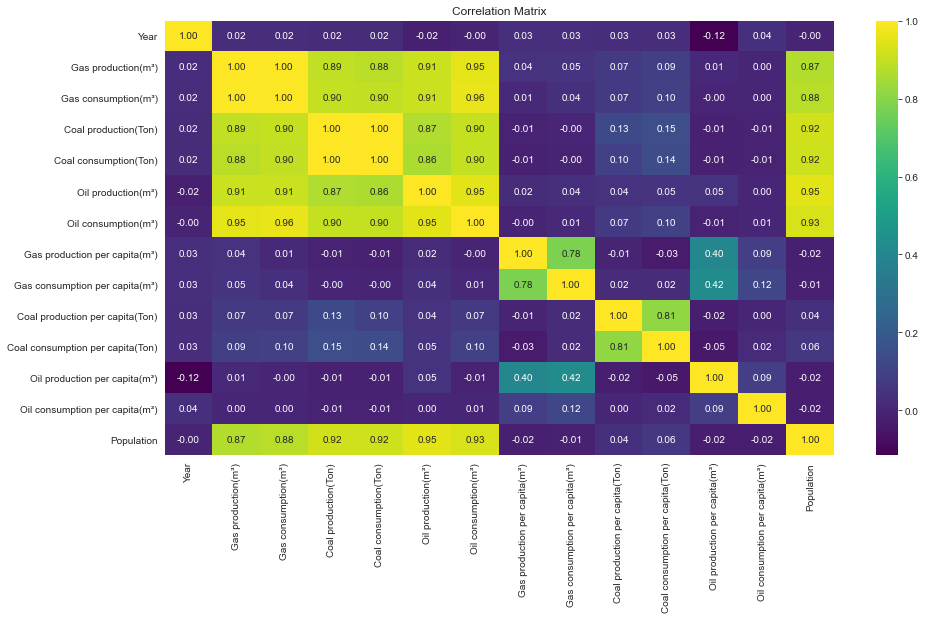

In [202]:
plt.figure(figsize=(15, 8))
sns.set_style("darkgrid")
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Matrix")

plt.show()

In [203]:
data.corr()['Gas production(m³)']

Year                                0.024231
Gas production(m³)                  1.000000
Gas consumption(m³)                 0.995320
Coal production(Ton)                0.892997
Coal consumption(Ton)               0.884365
Oil production(m³)                  0.910126
Oil consumption(m³)                 0.952889
Gas production per capita(m³)       0.044531
Gas consumption per capita(m³)      0.053732
Coal production per capita(Ton)     0.073760
Coal consumption per capita(Ton)    0.090055
Oil production per capita(m³)       0.008930
Oil consumption per capita(m³)      0.003715
Population                          0.872150
Name: Gas production(m³), dtype: float64

In [204]:
updated_data = data.drop('Entity', axis=1)
updated_data

,Year,Gas production(m³),Gas consumption(m³),Coal production(Ton),Coal consumption(Ton),Oil production(m³),Oil consumption(m³),Gas production per capita(m³),Gas consumption per capita(m³),Coal production per capita(Ton),Coal consumption per capita(Ton),Oil production per capita(m³),Oil consumption per capita(m³),Population
0,1980,1.699000e+09,5.664000e+07,1.190000e+05,1.190000e+05,0.000000e+00,4.065000e+05,127.200000,4.241000,0.008910,0.008910,0.000000,0.030430,13360000.0
1,1981,2.237000e+09,8.496000e+07,1.250000e+05,1.250000e+05,0.000000e+00,4.646000e+05,169.900000,6.450000,0.009490,0.009490,0.000000,0.035270,13170000.0
2,1982,2.294000e+09,1.416000e+08,1.450000e+05,1.450000e+05,0.000000e+00,4.529000e+05,178.100000,10.990000,0.011260,0.011260,0.000000,0.035160,12880000.0
3,1983,2.407000e+09,1.416000e+08,1.450000e+05,1.450000e+05,0.000000e+00,6.388000e+05,192.000000,11.290000,0.011570,0.011570,0.000000,0.050950,12540000.0
4,1984,2.407000e+09,1.416000e+08,1.480000e+05,1.480000e+05,0.000000e+00,6.388000e+05,197.200000,11.600000,0.012130,0.012130,0.000000,0.052340,12200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,2017,0.000000e+00,0.000000e+00,2.928000e+06,2.559000e+06,0.000000e+00,1.427000e+06,0.000000,0.000000,0.205700,0.179800,0.000000,0.100300,14240000.0
9233,2018,0.000000e+00,0.000000e+00,3.348000e+06,2.069000e+06,0.000000e+00,1.771000e+06,0.000000,0.000000,0.231800,0.143300,0.000000,0.122600,14440000.0
9234,2019,0.000000e+00,0.000000e+00,3.076000e+06,1.826000e+06,0.000000e+00,1.583000e+06,0.000000,0.000000,0.210100,0.124700,0.000000,0.108100,14650000.0
9235,2020,0.000000e+00,0.000000e+00,3.659000e+06,3.469000e+06,0.000000e+00,4.550758e+07,0.000000,0.000000,0.246200,0.233400,0.000000,1.392495,14860000.0


## Feature Selection

In [205]:
X = updated_data.drop(['Gas production(m³)'], axis=1)  # Features
y = updated_data['Gas production(m³)']  # Target variable

# Initialize SelectKBest with f_regression scoring
selector = SelectKBest(score_func=f_regression, k=10)  # Set the number of features you want

# Fit and transform the selector to your data
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Extract the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected features
print('Selected Features:')
print(selected_features)

Selected Features:
Index(['Gas consumption(m³)', 'Coal production(Ton)', 'Coal consumption(Ton)',
       'Oil production(m³)', 'Oil consumption(m³)',
       'Gas production per capita(m³)', 'Gas consumption per capita(m³)',
       'Coal production per capita(Ton)', 'Coal consumption per capita(Ton)',
       'Population'],
      dtype='object')


In [206]:
X = updated_data[['Gas consumption(m³)', 'Coal production(Ton)', 'Coal consumption(Ton)',
       'Oil production(m³)', 'Oil consumption(m³)',
       'Gas production per capita(m³)', 'Gas consumption per capita(m³)',
       'Coal production per capita(Ton)', 'Coal consumption per capita(Ton)',
       'Population']]
y = updated_data['Gas production(m³)'].values

## Scaling

In [207]:
# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.30101502e-01, -1.23374952e-01, -1.22459366e-01, ...,
        -2.87356980e-01, -4.51628467e-01, -1.21831328e-01],
       [-1.29947130e-01, -1.23360851e-01, -1.22445247e-01, ...,
        -2.86955643e-01, -4.51012838e-01, -1.22261314e-01],
       [-1.29638387e-01, -1.23313851e-01, -1.22398184e-01, ...,
        -2.85730871e-01, -4.49134109e-01, -1.22917608e-01],
       ...,
       [-1.30410245e-01, -1.16425874e-01, -1.18442503e-01, ...,
        -1.48141288e-01, -3.28725583e-01, -1.18911950e-01],
       [-1.30410245e-01, -1.15055799e-01, -1.14576243e-01, ...,
        -1.23161486e-01, -2.13348232e-01, -1.18436703e-01],
       [-2.07938309e-17,  0.00000000e+00,  0.00000000e+00, ...,
        -7.29819790e-16, -7.65975020e-16, -1.17916193e-01]])

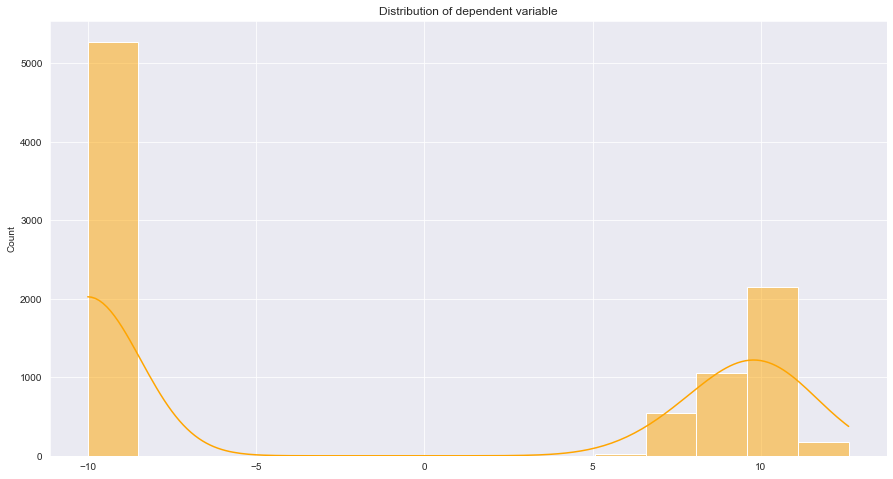

In [208]:
# Distribution of dependent variable
y = np.log10(y + 1e-10)  

plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')
sns.histplot(y, color="orange", kde=True)
plt.xticks(rotation=0)
plt.title("Distribution of dependent variable")
plt.show()

## Spliting

In [209]:
# Train-test split
X_train,X_test,y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2,random_state=42)

## Modeling

In [210]:
# Creating Logistic Regression
linreg_model = LinearRegression()

# Fitting the model and the training data
linreg_model.fit(X_train,y_train)

# predicting on the test data
y_pred = linreg_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)
print("Mean Square Error:", mse)
print(r2)


Mean Square Error: 78.92317207080937
<function r2_score at 0x00000248D062BB80>


In [211]:
# the intercept 
# Create a Linear Regression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the intercept
intercept = model.intercept_

print("Intercept:", intercept)

Intercept: -1.6929841151983753


In [212]:
# Lets test for overfitting
# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate the mean squared error on the training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
# Calculate the coefficient of determination (R^2) on the training and testing data
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R_squared:", train_r2)
print("Testing R_squared:", test_r2)

Training MSE: 76.50918393689079
Testing MSE: 78.92317207080937
Training R_squared: 0.1875603503898039
Testing R_squared: 0.17731412437888483


## Random Forest Regressor

In [216]:
# Creating a REF model
ranfor = RandomForestRegressor()

# cross validation to evaluate perfromance
cross_val_score = cross_val_score(ranfor,X_train, y_train,cv=5,scoring= 'neg_mean_squared_error')
# Convert the negative mean squared errors to positive
mse_scores = -cross_val_score

# Compute the mean squared error (MSE) and root mean squared error (RMSE)
mse = mse_scores.mean()
rmse = np.sqrt(mse)
ranfor.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = ranfor.predict(X_test)


# Calculate the R-squared score
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

TypeError: 'numpy.ndarray' object is not callable

In [215]:
print("Mean Score Error:", mse)
print("R2Score:", r2_score)


Mean Score Error: 0.37635972191095973
R2Score: <function r2_score at 0x00000248D062BB80>
